In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
# 임의의 5개 군집 생성
# 중심과 편차를 임의로 생성
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [5]:
# 약 2000개의 샘플 생성
# make_blobs는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.
# 즉 같은 방향으로 같은 성질을 같는 데이터(군집 데이터)를 생성한다.
# 중심과 편차를 설정하여 군집의 갯수를 정할 수 있다.
# X는 데이터의 좌표를 y는 군집 라벨을 뜻한다.
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0], X[:,1], c=y, s=1)
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14, rotation=0)

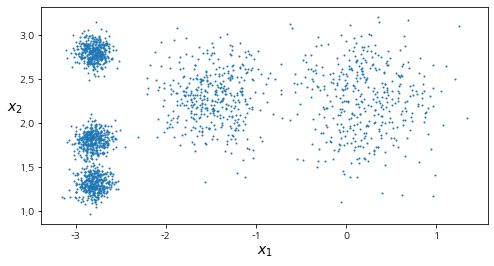

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [10]:
# 대표적인 군집분석에는 K-means 방법이 있다.
# K-means 방법은 중심에서 가까운 데이터들을 군집에 포함시키는 방법으로 거리 기반 알고리즘이다.
from sklearn.cluster import KMeans

In [35]:
# 5개의 군집으로 분류하길 희망하고 예측한다.
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [36]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [57]:
# y_pred를 따로 구하지 않아도 kmeans.labels_를 활용하면 볼 수 있다.
y_pred is kmeans.labels_

True

In [38]:
# kmeans를 사용했을 때 찾은 중심
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [39]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1])

In [40]:
# 새로운 데이터를 넣었을 때 분류되는 lebel값
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

In [41]:
# scatter plot 정의
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 중심 plot 정의 배경은 흰색, 중심은 검은색 X로 표시한다.
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:,0], centroids[:,1],
               marker='o', s=30, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1],
               marker='x', s=50, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    # 경계를 그리기 위한 그래프 생성
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # contourf 윤곽선 안의 내용을 색칠하는 함수이다.
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    # contour 윤곽선을 그리는 함수이다.
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

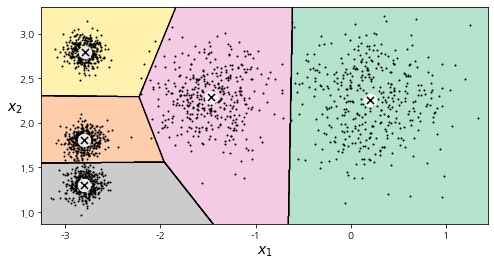

In [42]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [43]:
# 가장 가까운 클러스터를 선택한다. 각 샘플에서 중심과의 거리를 측정한 행렬을 반환한다.
# 가까운 순서대로 label을 정하면 [0, 0, 3, 3]과 같은 결과가 나온다. 
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [44]:
# 이건 transform을 사용하지 않고 직접 코딩한 결과이다.
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [45]:
# k-means 알고리즘을 1, 2, 3회 반복하고 중심이 어떻게 움직이는지 확인한다.
# 학습이 진행될 수록 중심을 잡아간다.
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=9)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=9)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=9)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=9,
       tol=0.0001, verbose=0)

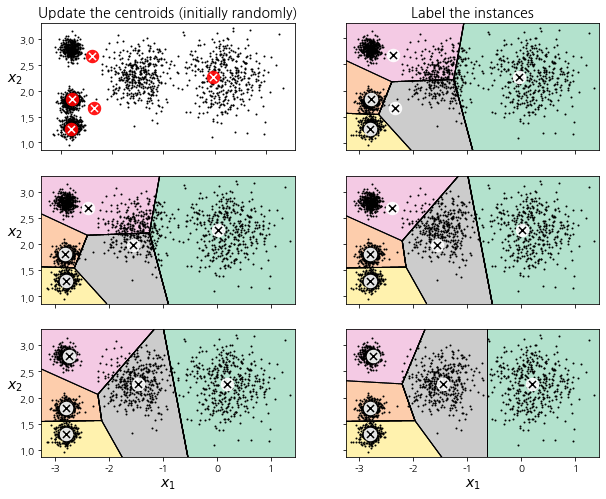

In [46]:
# 1. 랜덤한 중심 할당
# 2. label(레이블) 부여
# 3. 한번 더 학습하여 중심 재 설정
# 4. 레이블 부여
# 5. 한번 더 학습하여 중심 재 설정
# 6. 레이블 부여
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [47]:
# 랜덤 초기화가 잘못 될 경우(운이 않좋을 경우) 최적의 솔루션을 받지 못할 수 있다.
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

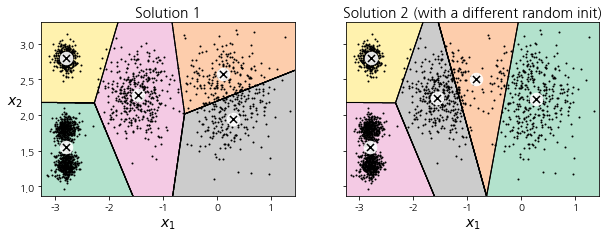

In [48]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=42)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=51)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [49]:
# 이너셔
# 각 샘플과 중심 사이의 거리는 측정할 수 있다. 이것이 이너셔 지표의 아이디어이다.
# 각 훈련 샘플과 가장 가까운 중심 사이의 제곱 거리합으로 쉽게 검증할 수 있다.

# kmeans 모델의 이너셔
kmeans.inertia_

211.5985372581684

In [50]:
# 이너셔 직접 구현
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [51]:
# 이너셔를 스코어화 한것
# 스코어는 큰 값이 좋게 인식되어있어 이너셔 score는 음수로 나타나진다.
kmeans.score(X)

-211.59853725816856

In [ ]:
# 다중 초기화
# 변동성 이슈를 해결하는 한 방법은 단순히 K-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을
# 선택한다. 예를 들어 앞선 그림에 있는 엉터리 모델 두 개의 이너셔는 다음과 같다.

In [52]:
kmeans_rnd_init1.inertia_

219.48142731436425

In [58]:
# init2가 더 높은 어니셔를 가지는 것으로 보아 더 나쁜 모델이란 것을 알 수 있다.
kmeans_rnd_init2.inertia_

236.6351925965028

In [59]:
# 10번 정도 반복한 결과 처음 모델과 같은 모델을 얻었다.
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

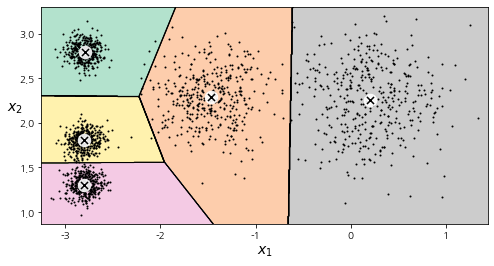

In [60]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [61]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [63]:
# 평균 속도 개선
# K-평균 알고리즘은 불필요한 거리 계산을 많이 피하는 식으로 속도를 크게 높일 수 있습니다. 
# 이를 위해 삼각 부등식을 사용합니다(3개의 포인트 A, B, C가 있을 때, 거리 AC는 항상 AC ≤ AB + BC를 만족합니다). 
# 그리고 샘플과 센트로이드 사이 거리의 최솟값과 최댓값을 유지합니다
# algorithm 방식에는 elkan의 k-평균 방식과 희소행렬을 사용하는 full 방식이 있다.

%timeit -n 50 KMeans(algorithm='elkan').fit(X)

58.4 ms ± 805 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [64]:
%timeit -n 50 KMeans(algorithm='full').fit(X)

80.9 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [65]:
# 미니배치 k-means
# 메모리에 들어가지 않는 대량의 데이터셋 군집 알고리즘을 적용할 수 있고 3배~4배 정도 속도가 빠르다.
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [66]:
minibatch_kmeans.inertia_

212.60420167587654

In [67]:
# 데이터셋이 메모리에 다 들어가지 못하면 가장 간단한 방법은 이전 장의 점진적 PCA에서 했던 것처럼 memmap 클래스를 사용하는 것입니다. 
# 먼저 MNIST 데이터를 로드합니다
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], random_state=42)

In [69]:
# memmap에 데이터를 기록한다.
filename = 'my_mnist.data'
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [70]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [71]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [72]:
np.random.seed(42)

In [73]:
# 여러번 초기화를 수행하고 이너셔가 가장 낮은 모델을 선택한다.
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # K-Means++ 초기화를 위해 충분한 데이터 전달
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [74]:
best_kmeans.score(X)

-211.70999744411483

In [75]:
%timeit KMeans(n_clusters=5).fit(X)

33.3 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

20.4 ms ± 674 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [78]:
# k의 증가에 따른 미니배치 k평균과 일반 k평균 사이의 이너셔와 훈련시간 그래프 그리기
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

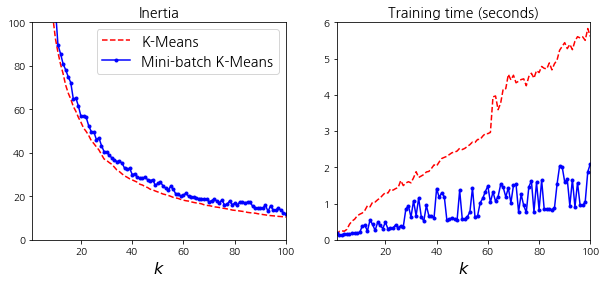

In [80]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
plt.show()

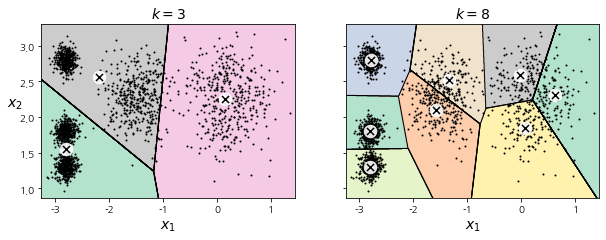

In [82]:
# 최적의 클러스터 갯수 찾기
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [83]:
kmeans_k3.inertia_

653.2167190021553

In [84]:
kmeans_k8.inertia_

118.41983763508077

In [85]:
# 이너셔가 작을 수록 좋은 모델이 아니다. 이너셔가 작을 수록 군집의 갯수가 많아져 과적합할 가능성이 높다.
# 그렇기 때문에 군집의 수에 따른 이너셔 그래프를 봐야한다.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

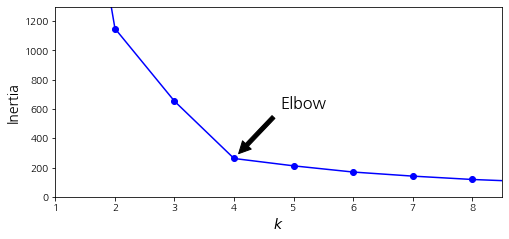

In [87]:
# 가장 이너셔의 감소폭이 작아지기 시작할 때가 가장 좋은 군집이라 볼 수 있다.
# 여기서는 군집의 갯수가 4개일 때 가장 좋은 모델이라고 나왔다.
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

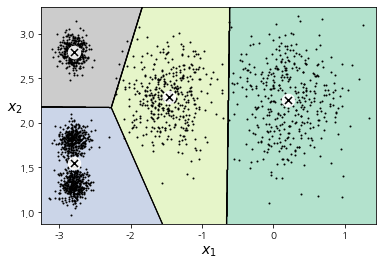

In [88]:
# 실제로 좋은 선택이지만 우리가 원하는 군집과는 결과가 다르다.
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

In [89]:
# 또 하나의 평가 방법인 실루엣 점수가 있다.
# 한 샘플의 실루엣 계수는 (b - a)/max(a, b)입니다. 
# 여기에서 a는 같은 클러스터에 있는 다른 샘플까지의 평균 거리입니다(이를 클러스터 내부 평균 거리 라고 합니다). 
# b는 가장 가까운 클러스터까지 평균 거리입니다. 
# 즉 가장 가까운 클러스터(샘플 자신의 클러스터를 제외하고 $b$를 최소화하는 클러스터)의 샘플까지 평균 거리입니다. 
# 실루엣 계수는 -1에서 +1 사이 값을 가집니다. +1에 가까우면 샘플이 다른 클러스터로부터 떨어져 자신의 클러스터 안에 잘 있다는 것을 의미합니다.
# 0에 가까우면 클러스터 경계에 가깝다는 의미입니다. -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을지 모릅니다.
from sklearn.metrics import silhouette_score

In [90]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [91]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

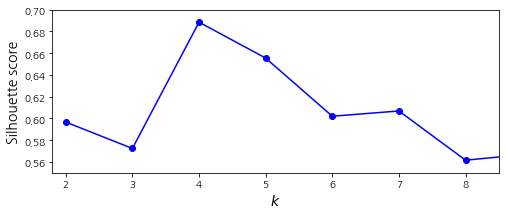

In [93]:
# 실루엣 점수에서도 군집의 갯수가 4개일 때 가장 좋은 모델이라고 보고있다.
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

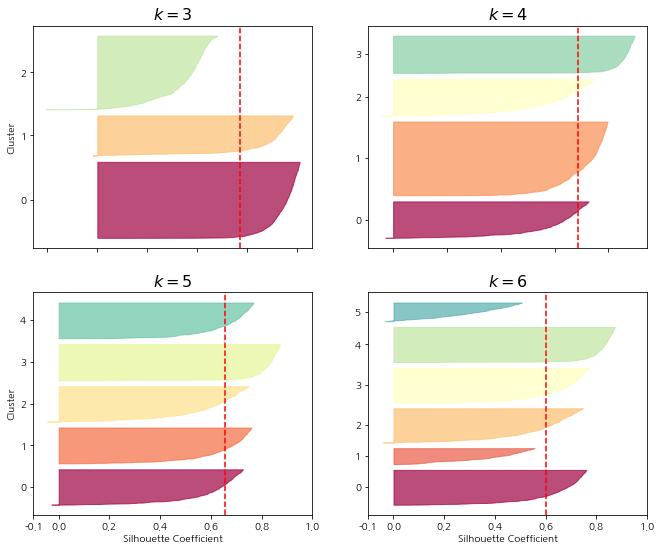

In [95]:
# 실루엣 다이어그램을 활용하여 해석해보자
# 막대그래프의 폭이 점선에 많이 포함될수록 좋은 모델이라 볼 수 있다.
# 그래프를 보니 4, 5개의 군집일 경우 좋은 모델인 것을 알 수 있는데 5개의 군집을 가질 때가 좀 더 좋은것으로 판단된다.
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [96]:
# k-means의 한계
# 속도가 빠르고 확장이 용이하다.
# 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 한다.
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

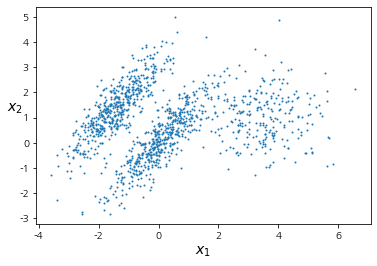

In [97]:
plot_clusters(X)

In [98]:
# 중심 초깃값을 잘 준 경우와 그렇지 못한 경우
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

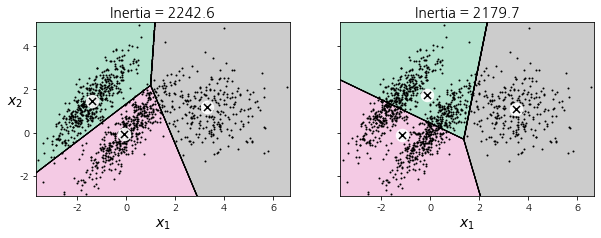

In [100]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

In [101]:
# DBSCAN(Density-base spatial clustering of applications with noise) : 밀도 기반 군집 분석
# DBSCAN은 밀도 기반 알고리즘 분석이다.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [102]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [103]:
# eps : 이웃을 정의하기 위한 거리
# min_samples : 핵심 데이터를 정의하기 위해 필요한 이웃영역안의 데이터 갯수
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [104]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [106]:
len(dbscan.core_sample_indices_)

808

In [107]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [108]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [109]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [110]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

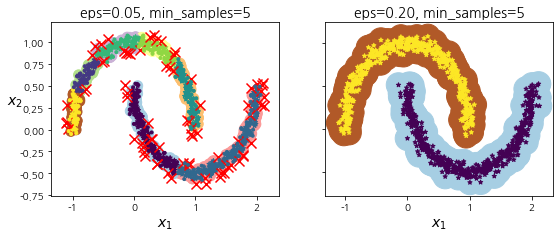

In [112]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [113]:
dbscan = dbscan2

In [114]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [116]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [117]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

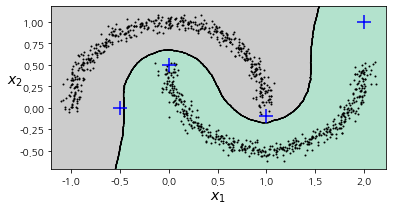

In [119]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [120]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)